<a href="https://www.kaggle.com/code/seuwenfei/classification-model-comparison?scriptVersionId=112352759" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# **Introduction**
Diabetes is a chronic disease that occurs either when the pancreas does not produce enough insulin or when the body cannot effectively use the insulin it produces. The objective of this study is **to identify the best model for classifying whether a female patient has diabetes**. The dataset from the National Institute of Diabetes and Digestive and Kidney Diseases will be used.

The dataset consists of 9 variables:

* **Pregnancies**: Number of times pregnant
* **Glucose**: Plasma glucose concentration a 2 hours in an oral glucose tolerance test
* **BloodPressure**: Diastolic blood pressure (mm Hg)
* **SkinThickness**: Triceps skin fold thickness (mm)
* **Insulin**: 2-Hour serum insulin (mu U/ml)
* **BMI**: Body mass index (weight in kg/(height in m)^2)
* **DiabetesPedigreeFunction**: Diabetes pedigree function
* **Age**: Age (years)
* **Outcome**: Class variable (0 or 1)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/predict-diabities/diabetes.csv


In [2]:
diabetes = pd.read_csv('/kaggle/input/predict-diabities/diabetes.csv')
diabetes.info()
diabetes.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


(768, 9)

* The dataset consists of 768 observations. 

In [3]:
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# **Exploratory Data Analysis**

In [4]:
# To check the entries for each variable
for col in diabetes.columns: 
  print('{} : {}'.format(col, diabetes[col].unique()))

Pregnancies : [ 6  1  8  0  5  3 10  2  4  7  9 11 13 15 17 12 14]
Glucose : [148  85 183  89 137 116  78 115 197 125 110 168 139 189 166 100 118 107
 103 126  99 196 119 143 147  97 145 117 109 158  88  92 122 138 102  90
 111 180 133 106 171 159 146  71 105 101 176 150  73 187  84  44 141 114
  95 129  79   0  62 131 112 113  74  83 136  80 123  81 134 142 144  93
 163 151  96 155  76 160 124 162 132 120 173 170 128 108 154  57 156 153
 188 152 104  87  75 179 130 194 181 135 184 140 177 164  91 165  86 193
 191 161 167  77 182 157 178  61  98 127  82  72 172  94 175 195  68 186
 198 121  67 174 199  56 169 149  65 190]
BloodPressure : [ 72  66  64  40  74  50   0  70  96  92  80  60  84  30  88  90  94  76
  82  75  58  78  68 110  56  62  85  86  48  44  65 108  55 122  54  52
  98 104  95  46 102 100  61  24  38 106 114]
SkinThickness : [35 29  0 23 32 45 19 47 38 30 41 33 26 15 36 11 31 37 42 25 18 24 39 27
 21 34 10 60 13 20 22 28 54 40 51 56 14 17 50 44 12 46 16  7 52 43 48  8


The values of Glucose, Blood Pressure, Skin Thickness, Insulin and BMI are unlikely to be 0. Therefore, values of 0 will be corrected to NAN.

In [5]:
# To correct values of 0 to NAN
replace_value = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

for col in replace_value:
    diabetes[col].replace({0 : np.nan}, inplace=True)

,Column,Missing_Count,Percentage(%)
0,Pregnancies,0,0.00
1,Glucose,5,0.65
2,BloodPressure,35,4.56
3,SkinThickness,227,29.56
4,Insulin,374,48.70
5,BMI,11,1.43
6,DiabetesPedigreeFunction,0,0.00
7,Age,0,0.00
8,Outcome,0,0.00


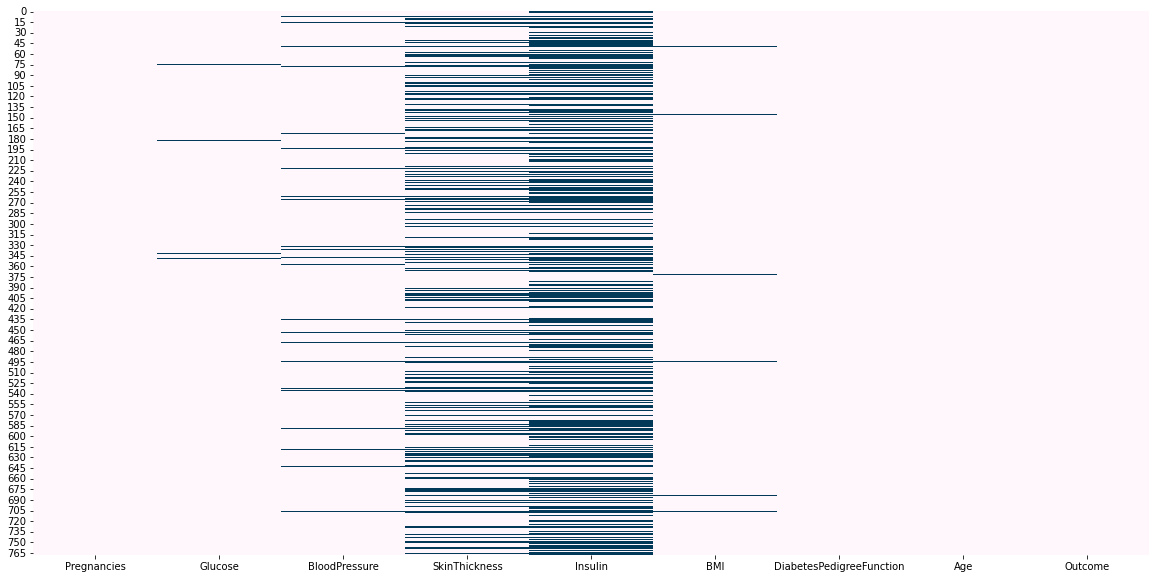

In [6]:
# To visualize the missing values / NAN 
plt.figure(figsize=(20,10))
sns.heatmap(diabetes.isnull(), cbar=False, cmap=plt.cm.PuBu)

# To check the percentage of missing value / NAN 
df = pd.DataFrame()
df['Column'] = diabetes.columns
df['Missing_Count'] = [diabetes[col].isnull().sum() for col in diabetes.columns]
df['Percentage(%)'] = [round((diabetes[col].isnull().sum() / diabetes.shape[0])*100, 2) for col in diabetes.columns]

df

No variables are dropped based on the results shown above. This is because as a rule of thumb, a variable need to be dropped when it is missing 60-70% of its data. Imputation will be used to handle missing values.

<Figure size 432x288 with 0 Axes>

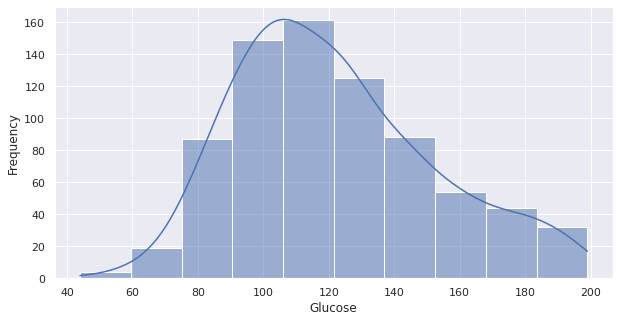

<Figure size 720x360 with 0 Axes>

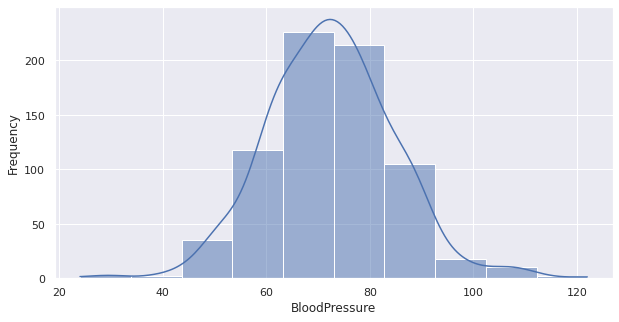

<Figure size 720x360 with 0 Axes>

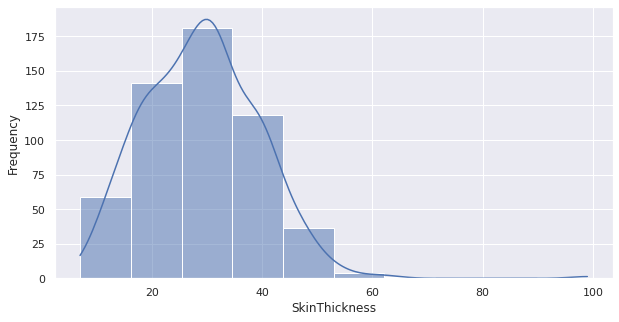

<Figure size 720x360 with 0 Axes>

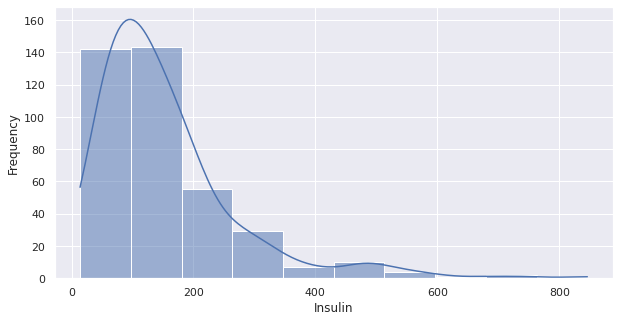

<Figure size 720x360 with 0 Axes>

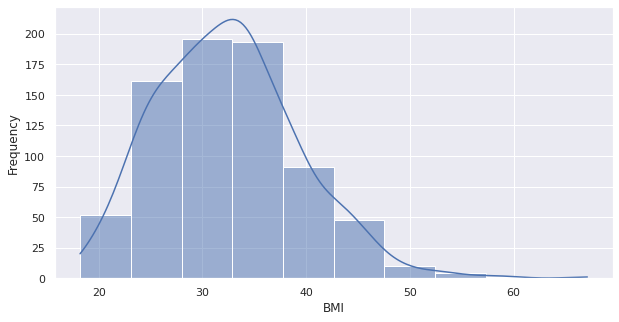

In [7]:
# To visualize data distribution for variables with missing values
for col in replace_value:
    plt.figure()
    plt.tight_layout()
    sns.set(rc={'figure.figsize': (10,5)})

    f, ax = plt.subplots()
    plt.gca().set(xlabel=col, ylabel='Frequency')
    sns.histplot(diabetes[col], bins=10, kde=True)

Since the data for Glucose, Skin Thickness, Insulin and BMI are not normally distributed as shown above, the median will be used to impute missing values. However, blood pressure follows a normal distribution and the mean will be used to impute missing values.

In [8]:
# To impute the missing values with median
replace_median = ['Glucose', 'SkinThickness', 'Insulin', 'BMI']
for col in replace_median:
    diabetes[col] = diabetes[col].fillna(diabetes[col].median())

# To impute the missing values with mean
diabetes['BloodPressure'] = diabetes['BloodPressure'].fillna(diabetes['BloodPressure'].mean())

diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,125.0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,125.0,26.6,0.351,31,0
2,8,183.0,64.0,29.0,125.0,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [9]:
# To obtain descriptive statistics
diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.656250,72.405184,29.108073,140.671875,32.455208,0.471876,33.240885,0.348958
std,3.369578,30.438286,12.096346,8.791221,86.383060,6.875177,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,25.000000,121.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.202592,29.000000,125.000000,32.300000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


0    500
1    268
Name: Outcome, dtype: int64


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Outcome', ylabel='count'>

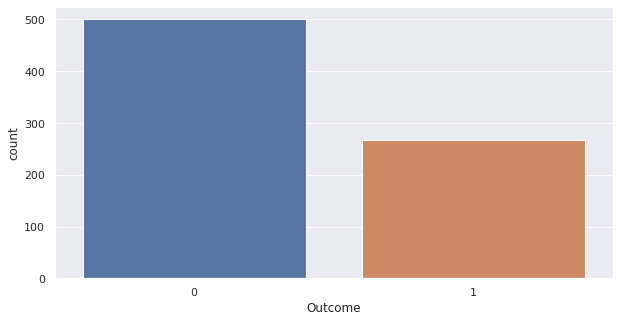

In [10]:
print(diabetes['Outcome'].value_counts())

# To visualize the counts of Outcome
plt.figure(figsize=(10,5))
sns.countplot(diabetes['Outcome'])

From the above results, the number of non-diabetic patients is much more than that of diabetic patients, which shows that the data is imbalanced.

array([[<AxesSubplot:title={'center':'Pregnancies'}>,
        <AxesSubplot:title={'center':'Glucose'}>,
        <AxesSubplot:title={'center':'BloodPressure'}>],
       [<AxesSubplot:title={'center':'SkinThickness'}>,
        <AxesSubplot:title={'center':'Insulin'}>,
        <AxesSubplot:title={'center':'BMI'}>],
       [<AxesSubplot:title={'center':'DiabetesPedigreeFunction'}>,
        <AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Outcome'}>]], dtype=object)

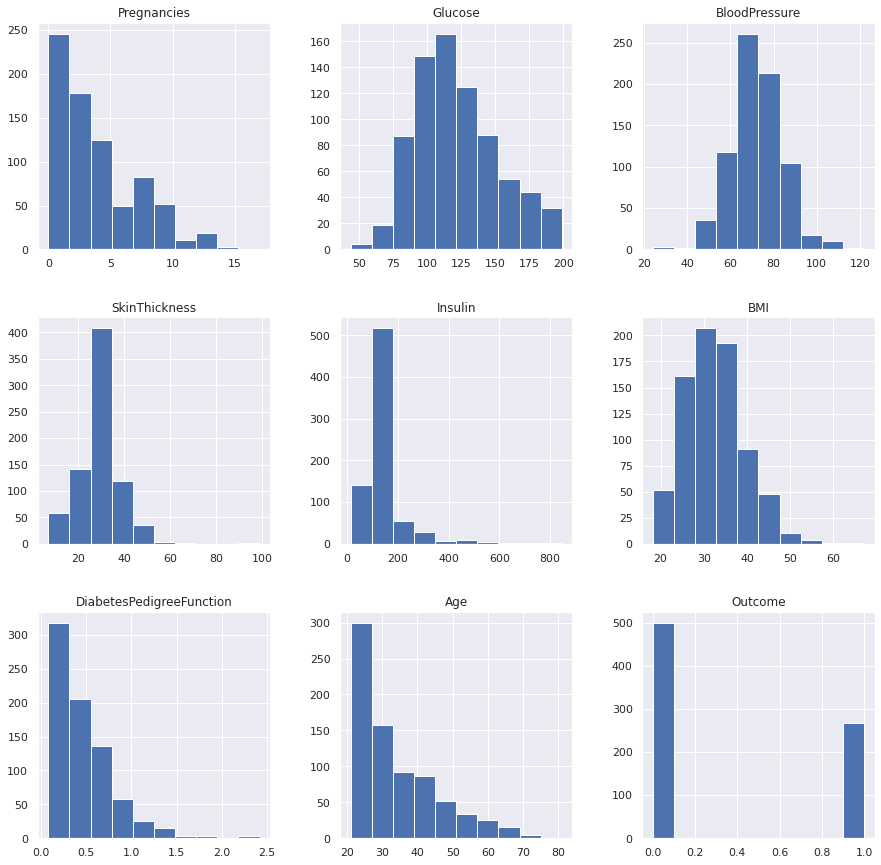

In [11]:
diabetes.hist(bins=10,figsize=(15,15))

According to the results above, all variables are skewed, except for blood pressure, which has a normal distribution.

Text(0.5, 1.0, 'Correlation')

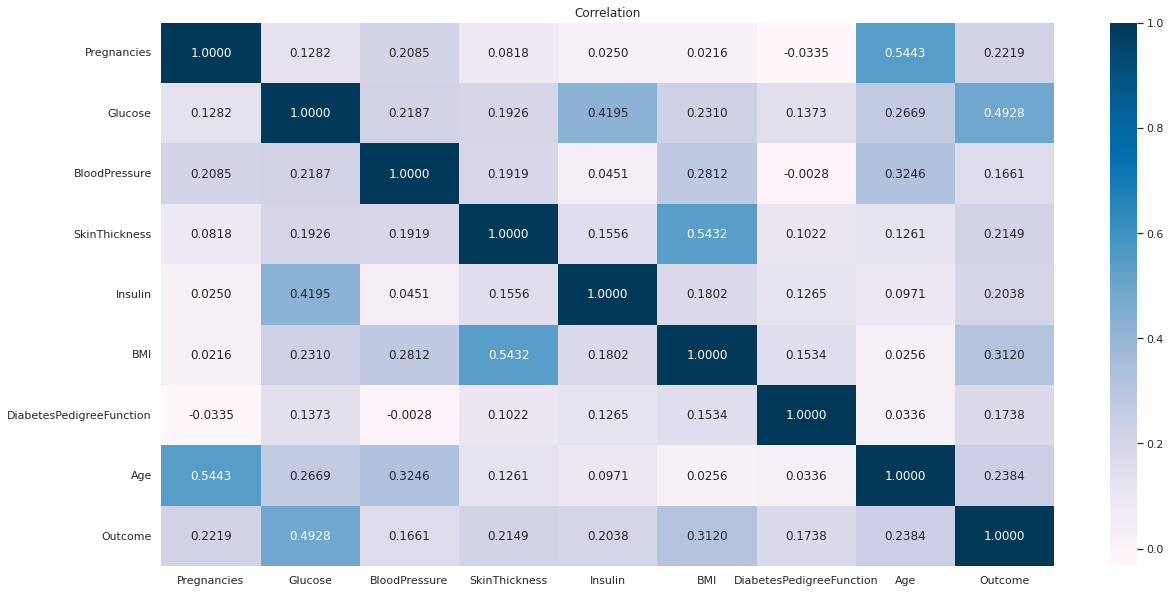

In [12]:
# To assess the association between the variables
plt.figure(figsize=(20,10))
sns.heatmap(diabetes.corr(), cbar=True, fmt='.4f', annot=True, cmap=plt.cm.PuBu)
plt.title('Correlation')

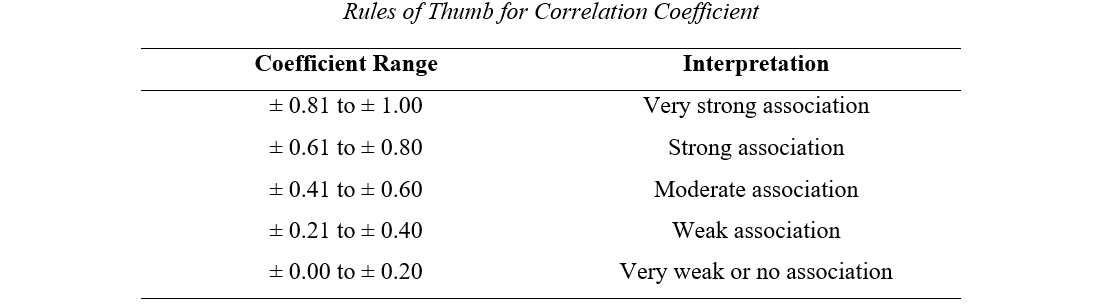

Based on the outputs above, Glucose and Outcome have a moderately strong positive relationship. Meanwhile BMI, Pregnancies, Age, Skin Thickness and Insulin have a weak positive relationship with Outcome.

# **Feature Selection**

The mutual information will be used to measures the dependency between the variables.

Glucose                     0.132128
BMI                         0.070622
Age                         0.046833
Insulin                     0.034658
Pregnancies                 0.033064
DiabetesPedigreeFunction    0.010656
BloodPressure               0.003267
SkinThickness               0.000000
Name: Mutual Information Scores, dtype: float64

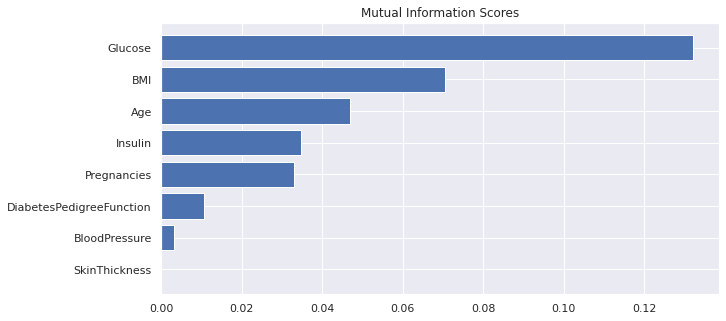

In [13]:
from sklearn.feature_selection import mutual_info_classif

def make_mi_scores(X, y):
    X = X.copy()
    mi_scores = mutual_info_classif(X, y, random_state=0)
    mi_scores = pd.Series(mi_scores, name='Mutual Information Scores', index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return(mi_scores)

def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title('Mutual Information Scores')


# Define X and y
X = diabetes.copy()
y = X.pop('Outcome')


mi_scores = make_mi_scores(X, y)
display(mi_scores)
plot_mi_scores(mi_scores)

Based on the outputs above, the MI scores for Skin Thickness are 0, indicating that the variables and Outcome are independent (No information flow). Skin Thickness are therefore not chosen as features.

In [14]:
# To reduce input variables
X.drop(['SkinThickness'], axis=1, inplace=True)

X.head()

,Pregnancies,Glucose,BloodPressure,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148.0,72.0,125.0,33.6,0.627,50
1,1,85.0,66.0,125.0,26.6,0.351,31
2,8,183.0,64.0,125.0,23.3,0.672,32
3,1,89.0,66.0,94.0,28.1,0.167,21
4,0,137.0,40.0,168.0,43.1,2.288,33


# **Build Classification Model**

Binary classification methods including Logistic Regression, Support Vector Machines, Decision Trees, Random Forest, Naive Bayes, and K-Nearest Neighbors Classifiers will be used since the Outcome includes two groups (diabetes & non-diabetes).

In [15]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Split into validation and training data
X_train, X_valid, y_train, y_valid = train_test_split(X, y, stratify=y, train_size=0.75, random_state=0)

# To standardize features
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_valid = sc.transform(X_valid)

In [16]:
models = {}

# Logistic Regression
from sklearn.linear_model import LogisticRegression
models['Logistic Regression'] = LogisticRegression()

# Support Vector Machines
from sklearn.svm import LinearSVC
models['Support Vector Machines'] = LinearSVC()

# Decision Trees
from sklearn.tree import DecisionTreeClassifier
models['Decision Trees'] = DecisionTreeClassifier()

# Random Forest
from sklearn.ensemble import RandomForestClassifier
models['Random Forest'] = RandomForestClassifier()

# Naive Bayes
from sklearn.naive_bayes import GaussianNB
models['Naive Bayes'] = GaussianNB()

# K-Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier
models['K-Nearest Neighbor'] = KNeighborsClassifier()

# **Model Evaluation**

/opt/conda/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


,Accuracy,Precision,Recall,F1
Logistic Regression,0.755208,0.537313,0.692308,0.605042
Support Vector Machines,0.755208,0.537313,0.692308,0.605042
Decision Trees,0.708333,0.492537,0.600000,0.540984
Random Forest,0.776042,0.611940,0.706897,0.656000
Naive Bayes,0.765625,0.611940,0.683333,0.645669
K-Nearest Neighbor,0.723958,0.507463,0.629630,0.561983


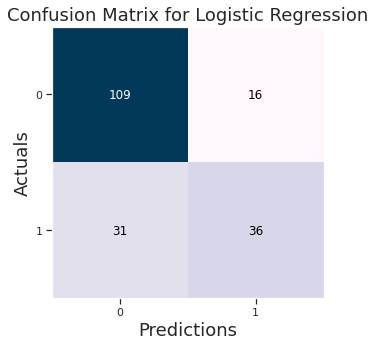

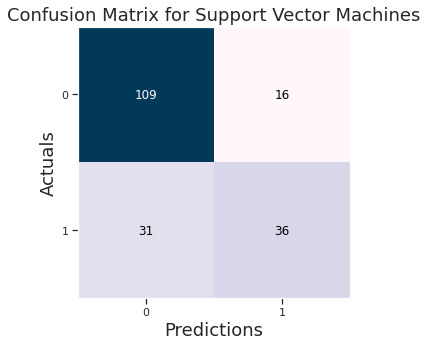

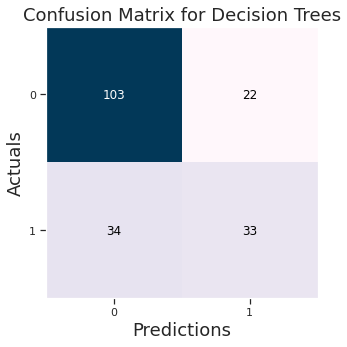

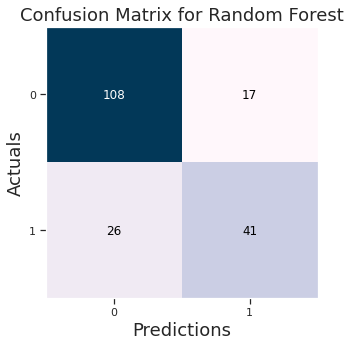

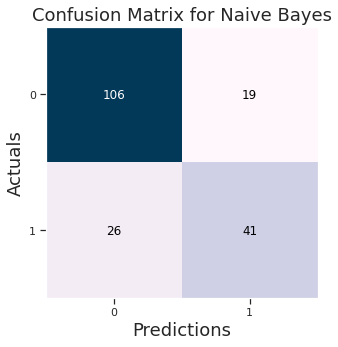

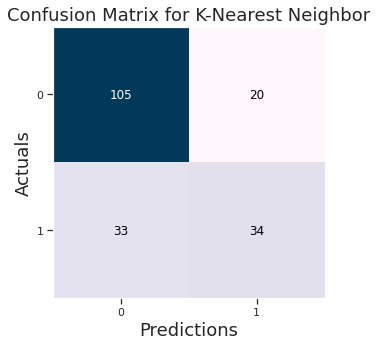

In [17]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy, precision, recall, f1 = {}, {}, {}, {}

for key in models.keys():
    
    # Fit the classifier
    models[key].fit(X_train, y_train)
    
    # Make predictions
    predictions = models[key].predict(X_valid)
    
    # Calculate metrics
    accuracy[key] = accuracy_score(predictions, y_valid)
    precision[key] = precision_score(predictions, y_valid)
    recall[key] = recall_score(predictions, y_valid)
    f1[key] = f1_score(predictions, y_valid)
    
    #Plot confusion matrix
    from sklearn.metrics import confusion_matrix
    cm = confusion_matrix(y_valid, predictions)
    
    from mlxtend.plotting import plot_confusion_matrix
    fig, ax = plot_confusion_matrix(conf_mat=cm, figsize=(5, 5), cmap=plt.cm.PuBu)
    plt.xlabel('Predictions', fontsize=18)
    plt.ylabel('Actuals', fontsize=18)
    plt.title('Confusion Matrix for {}'.format(key), fontsize=18)


df_model = pd.DataFrame(index=models.keys(), columns=['Accuracy', 'Precision', 'Recall', 'F1'])
df_model['Accuracy'] = accuracy.values()
df_model['Precision'] = precision.values()
df_model['Recall'] = recall.values()
df_model['F1'] = f1.values()

df_model

Based on the results above:

* Random Forest model has the highest accuracy score. This shows that the model correctly predicted **77.6%** of the actual cases of diabetes and non-diabetes.

* Random Forest model has the second highest precision score, indicating that **59.7%** of the outcomes are relevant.

* Random Forest model gets the highest recall score, which implies that it accurately identified **71.4%** of all relevant outcomes.

* Random Forest model achieved the highest F1 score, **0.65**. F1 score is useful when dealing with imbalanced classes. This means that the Random Forest model has the fewest false positives and false negatives compared to other models.

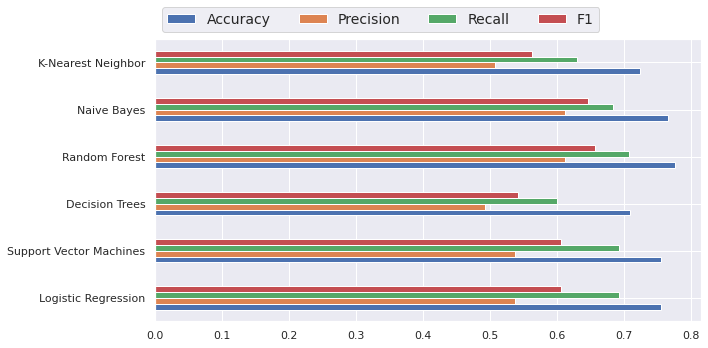

In [18]:
# To compare the model performance using bar chart
ax = df_model.plot.barh()
ax.legend(
    ncol=len(models.keys()), 
    bbox_to_anchor=(0, 1), 
    loc='lower left', 
    prop={'size': 14}
)
plt.tight_layout()

# **Conclusion**

The Random Forest model is a better model for determining whether a female patient has diabetes